<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Apprendimento_classificatore_Bayesiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento di un classificatrore Bayesiano

In questo notebook andremo ad addestrare un o più classificatori Bayesiani cercando di effettuari quanti più esperimenti possibili per creare una baseline del problema che stiamo affrontando e cercare di tirare fuori un modello capace di battere il nostro attuale lower bound rappresentato dallo stimatore moda.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()


In [2]:
df = pd.read_csv('HCV-Egy-Data.csv', delimiter=',')
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [ ]:
df_reduced = pd.read_csv('pca_reduced_df_uncleaned.csv', delimiter=',')
print(df_reduced)

Primo esperimento addestramento Gaussian Naive Bayes su il dataframe di partenza uncleaned con approccio classico con una cross-validation a 10 folds.

In [3]:
# inizio dell'addestramento con Gaussina Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# preparazione del data set diviso infeature e target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB = GaussianNB()

# usiamo la cross-val
scores = cross_val_score(model_GB, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)


Accurancy su ogni ciclo della cross-validation: [0.25179856 0.21582734 0.26618705 0.24460432 0.27338129 0.23188406
 0.20289855 0.29710145 0.23188406 0.25362319]
Accurancy mediata su i 10 fold fatti: 0.24691898654989056


In [4]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")


In [5]:
values = [5, 10, 15, 20]
classifier_model = [GaussianNB]

evaluate_classifiers(values, classifier_model, X, y)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.22743682 0.2599278  0.20216606 0.24548736 0.25631769]
----------
CV: 10
Mean Accuracy: 0.24691898654989056
Scores: [0.25179856 0.21582734 0.26618705 0.24460432 0.27338129 0.23188406
 0.20289855 0.29710145 0.23188406 0.25362319]
----------
CV: 15
Mean Accuracy: 0.24475611656537324
Scores: [0.2688172  0.19354839 0.27956989 0.27956989 0.21505376 0.26086957
 0.29347826 0.22826087 0.18478261 0.15217391 0.32608696 0.22826087
 0.23913043 0.27173913 0.25      ]
----------
CV: 20
Mean Accuracy: 0.24333333333333335
Scores: [0.24285714 0.24285714 0.21428571 0.22857143 0.27142857 0.26086957
 0.2173913  0.27536232 0.30434783 0.20289855 0.24637681 0.1884058
 0.17391304 0.24637681 0.36231884 0.24637681 0.14492754 0.28985507
 0.27536232 0.23188406]
----------


In [6]:
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y, step):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

Proviamo a generare dei plot sul comportamente del parametro scelto per effettuare i fold della cross-validation e andiamo ad eseguire una serie di prove per capire quale sia il miglior k.

In [ ]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X, y)

Gli esperimenti condotti purtoppo si dichiarano ad oggi un fallimento sull'addestramento, di seguito proveremo a ripetere gli stessi passi di addestramento fatti precedentemente, ma sul dataset ridotto di dimensionalità con la tecnica della PCA usata anche negli esperimenti condotti sul decision tree.

In [34]:
# preparazione degli attributi che faranno da predittori e del target
X_pca = df_reduced.drop('Baselinehistological staging', axis=1)
y_pca = df_reduced['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB2 = GaussianNB()

# usiamo la cross-val
scores2 = cross_val_score(model_GB2, X_pca, y_pca, cv=10)
mean_accurancy2 = scores2.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores2)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy2)

Accurancy su ogni ciclo della cross-validation: [0.21582734 0.17985612 0.23741007 0.25179856 0.23741007 0.26811594
 0.16666667 0.36231884 0.25362319 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.24338963611719316


Anche in questo caso i risultati non lasciano sperare in bene ma procediamo nella verifica

In [35]:
# primo tentativo con i classici valori di cross-val utilizzati in letteratura
values2 = [5, 10, 15, 20]
classifier_model2 = [GaussianNB]

evaluate_classifiers(values2, classifier_model2, X_pca, y_pca)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 10
Mean Accuracy: 0.24338963611719316
Scores: [0.21582734 0.17985612 0.23741007 0.25179856 0.23741007 0.26811594
 0.16666667 0.36231884 0.25362319 0.26086957]
----------
CV: 15
Mean Accuracy: 0.23622409225494778
Scores: [0.21505376 0.17204301 0.16129032 0.2688172  0.19354839 0.2826087
 0.2173913  0.2826087  0.23913043 0.13043478 0.31521739 0.31521739
 0.2173913  0.25       0.2826087 ]
----------
CV: 20
Mean Accuracy: 0.2383022774327122
Scores: [0.21428571 0.25714286 0.2        0.21428571 0.25714286 0.24637681
 0.1884058  0.27536232 0.24637681 0.2173913  0.23188406 0.23188406
 0.14492754 0.24637681 0.4057971  0.31884058 0.15942029 0.17391304
 0.23188406 0.30434783]
----------


Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 2
Mean Accuracy: 0.2469357071958228
Scores: [0.24098124 0.25289017]
----------
CV: 3
Mean Accuracy: 0.23468023901863377
Scores: [0.2034632  0.23376623 0.26681128]
----------
CV: 4
Mean Accuracy: 0.23902025620096282
Scores: [0.19596542 0.23988439 0.23699422 0.28323699]
----------
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 6
Mean Accuracy: 0.24117886943973899
Scores: [0.19480519 0.19480519 0.23809524 0.22510823 0.32034632 0.27391304]
----------
CV: 7
Mean Accuracy: 0.23538869477955773
Scores: [0.20707071 0.21212121 0.24242424 0.22727273 0.22727273 0.28282828
 0.24873096]
----------
CV: 8
Mean Accuracy: 0.2419108364892698
Scores: [0.1954023  0.21965318 0.24855491 0.23121387 0.24855491 0.27745665
 0.28901734 0.22543353]
----------
CV: 9
Mean Accuracy: 0.23395486140584185
Scores: [0.2012987  0.19480519 0.20779221 0.23376623 0.24675325 0.18831169
 0.32467532 

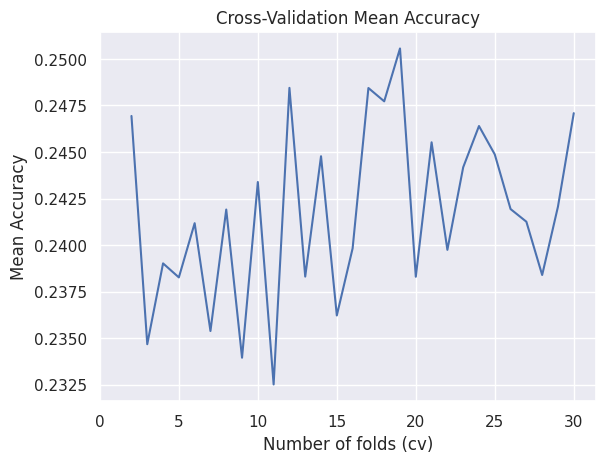

In [43]:
# ottimizzazione della cross-validation usando il dataframe dove abbiamo applicato la pca
list_cv2 = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv2, classifier_model, X_pca, y_pca)

Anche in questo caso gli esperimento non sono andati a buon fine e vediamo come tendendo a lanciare il Gaussian Naive Bayes con dicersi valori K per i fold i massimi si raggiungono tra 17-25 su tutti i plot effettuati con iterazione da 2 a 30, 100 e 300 fold notiamo che il GB ho meno varianza rispetto al decision tree il quale oscillava tra valori di accurancy bassi fino al 18% e poteva arrivare anche olre il 30% qui il GB oscilla in un intervallo più stretto tra 22% e 26% tuttavia il 26% viene raggiunto pochissime volte negli esperimenti fatti per tali ragioni ad oggi sembra che il decision tree nonostante abbia più varianza si compori meglio.

Facciamo un tentavo nell'addestramento di un'altro classificatore Bayesiano

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
# istanziazione del modello Gaussian Naive Bayes
model_MNB = MultinomialNB()

# usiamo la cross-val
scores_MNB = cross_val_score(model_MNB, X, y, cv=10)
mean_accurancy_MNB = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_MNB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_MNB)

Accurancy su ogni ciclo della cross-validation: [0.25179856 0.26618705 0.27338129 0.26618705 0.25179856 0.26811594
 0.24637681 0.28985507 0.27536232 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.24691898654989056


In [9]:
# proviamo i principali k fold
classifier_MNB = [MultinomialNB]

evaluate_classifiers(values, classifier_MNB, X, y)

Classifier: <class 'sklearn.naive_bayes.MultinomialNB'>
CV: 5
Mean Accuracy: 0.25703971119133573
Scores: [0.23104693 0.27797834 0.24909747 0.26353791 0.26353791]
----------
CV: 10
Mean Accuracy: 0.2635439474507351
Scores: [0.25179856 0.26618705 0.27338129 0.26618705 0.25179856 0.26811594
 0.24637681 0.28985507 0.27536232 0.24637681]
----------
CV: 15
Mean Accuracy: 0.2541296556023064
Scores: [0.2688172  0.21505376 0.27956989 0.31182796 0.22580645 0.29347826
 0.23913043 0.19565217 0.27173913 0.2173913  0.29347826 0.22826087
 0.26086957 0.27173913 0.23913043]
----------
CV: 20
Mean Accuracy: 0.2555383022774328
Scores: [0.28571429 0.24285714 0.28571429 0.24285714 0.3        0.28985507
 0.2173913  0.31884058 0.24637681 0.1884058  0.20289855 0.34782609
 0.2173913  0.24637681 0.24637681 0.23188406 0.28985507 0.2173913
 0.26086957 0.23188406]
----------


Classifier: <class 'sklearn.naive_bayes.MultinomialNB'>
CV: 2
Mean Accuracy: 0.24403510747441384
Scores: [0.25541126 0.23265896]
----------
CV: 3
Mean Accuracy: 0.2541498029567444
Scores: [0.25757576 0.25324675 0.2516269 ]
----------
CV: 4
Mean Accuracy: 0.2570484416384868
Scores: [0.24495677 0.28034682 0.24277457 0.26011561]
----------
CV: 5
Mean Accuracy: 0.25703971119133573
Scores: [0.23104693 0.27797834 0.24909747 0.26353791 0.26353791]
----------
CV: 6
Mean Accuracy: 0.2606656628395759
Scores: [0.25108225 0.25974026 0.24242424 0.24242424 0.28571429 0.2826087 ]
----------
CV: 7
Mean Accuracy: 0.2628386841584811
Scores: [0.24747475 0.26262626 0.27777778 0.21212121 0.27272727 0.27272727
 0.29441624]
----------
CV: 8
Mean Accuracy: 0.2563284831572653
Scores: [0.24137931 0.24277457 0.26011561 0.23699422 0.24277457 0.24855491
 0.28323699 0.29479769]
----------
CV: 9
Mean Accuracy: 0.2584811702458761
Scores: [0.25324675 0.26623377 0.27922078 0.28571429 0.21428571 0.27272727
 0.25324675 0

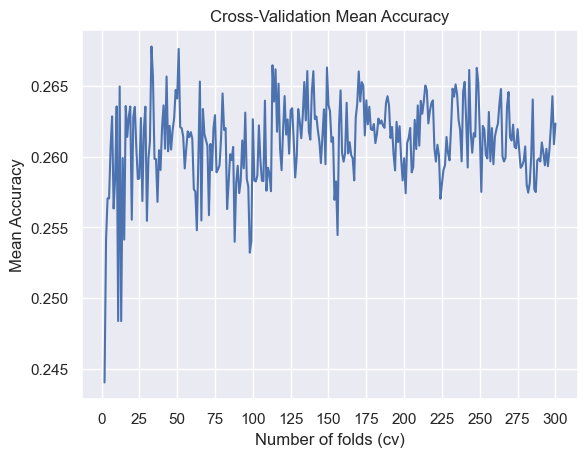

In [12]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,301) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_MNB, X, y, 25)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 2
Mean Accuracy: 0.2469357071958228
Scores: [0.24098124 0.25289017]
----------
CV: 3
Mean Accuracy: 0.23468023901863377
Scores: [0.2034632  0.23376623 0.26681128]
----------
CV: 4
Mean Accuracy: 0.23902025620096282
Scores: [0.19596542 0.23988439 0.23699422 0.28323699]
----------
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 6
Mean Accuracy: 0.24117886943973899
Scores: [0.19480519 0.19480519 0.23809524 0.22510823 0.32034632 0.27391304]
----------
CV: 7
Mean Accuracy: 0.23538869477955773
Scores: [0.20707071 0.21212121 0.24242424 0.22727273 0.22727273 0.28282828
 0.24873096]
----------
CV: 8
Mean Accuracy: 0.2419108364892698
Scores: [0.1954023  0.21965318 0.24855491 0.23121387 0.24855491 0.27745665
 0.28901734 0.22543353]
----------
CV: 9
Mean Accuracy: 0.23395486140584185
Scores: [0.2012987  0.19480519 0.20779221 0.23376623 0.24675325 0.18831169
 0.32467532 

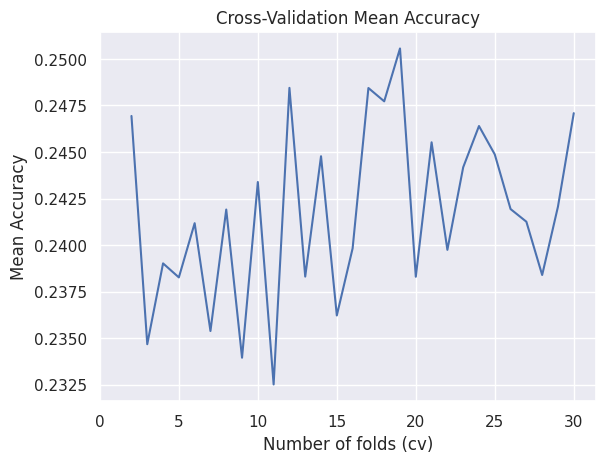

In [72]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation lavorando sul dataset ridotto con pca
list_cv = range(2,101) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X_pca, y_pca, 5)

COnclusioni sugli esperimenti condotti anche in questo caso non abbiamo ottenuti i risultati che volevamo, inoltre il MultinomialNB sembra comportarsi quasi identicamente a come si è comportato il GaussianNB quindi le loro performance sull'accurancy sono pressapoco identiche.   

In [13]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB

In [14]:
# istanziazione del modello Bernoulli Naive Bayes
model_Ber = BernoulliNB()

# usiamo la cross-val
scores_Ber = cross_val_score(model_Ber, X, y, cv=10)
mean_accurancy_Ber = scores_Ber.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_Ber)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_Ber)

Accurancy su ogni ciclo della cross-validation: 
 [0.25899281 0.25899281 0.26618705 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.2613700344072568


In [15]:
# istanziazione del modello Compleement Naive Byes
model_CNB = ComplementNB()

# usiamo la cross-val
scores_CNB = cross_val_score(model_CNB, X, y, cv=10)
mean_accurancy_CNB = scores_CNB.mean()
print("Accurancy su ogni ciclo della cross-validation: \n", scores_CNB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_CNB)

Accurancy su ogni ciclo della cross-validation: 
 [0.24460432 0.26618705 0.28776978 0.26618705 0.24460432 0.26086957
 0.23188406 0.2826087  0.27536232 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.26064539672609743


In [16]:
# esperimento condotto dalla disperazione del momento
Bayes_model = [BernoulliNB, ComplementNB]

evaluate_classifiers(values, Bayes_model, X, y)

Classifier: <class 'sklearn.naive_bayes.BernoulliNB'>
CV: 5
Mean Accuracy: 0.26137184115523465
Scores: [0.2599278  0.2599278  0.26353791 0.26353791 0.2599278 ]
----------
CV: 10
Mean Accuracy: 0.2613700344072568
Scores: [0.25899281 0.25899281 0.26618705 0.26618705 0.25899281 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957]
----------
CV: 15
Mean Accuracy: 0.26136824061087727
Scores: [0.25806452 0.25806452 0.2688172  0.2688172  0.25806452 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957
 0.26086957 0.26086957 0.26086957]
----------
CV: 20
Mean Accuracy: 0.26138716356107666
Scores: [0.25714286 0.25714286 0.25714286 0.25714286 0.25714286 0.26086957
 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957 0.26086957
 0.27536232 0.27536232 0.26086957 0.26086957 0.26086957 0.26086957
 0.26086957 0.26086957]
----------
Classifier: <class 'sklearn.naive_bayes.ComplementNB'>
CV: 5
Mean Accuracy: 0.25776173285198556
Scores: [0.23826715 0.27436823 0.24187726 0.

Output streaming troncato alle ultime 5000 righe.
 0.22222222 0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0

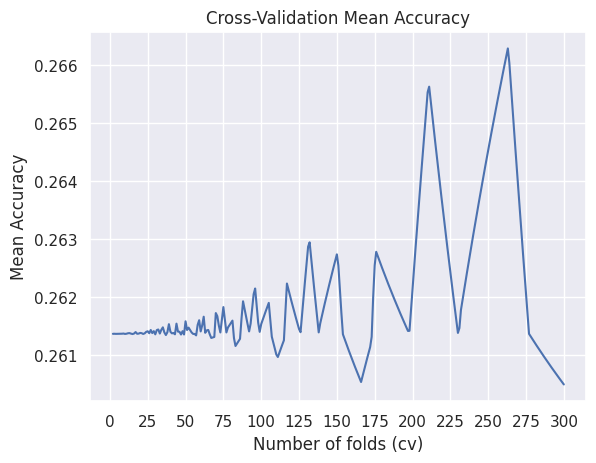

Output streaming troncato alle ultime 5000 righe.
 0.55555556 0.25       0.25       0.25       0.25       0.25
 0.5        0.375      0.375      0.125      0.25       0.25
 0.5        0.         0.125      0.25       0.5        0.
 0.375      0.25       0.375      0.25       0.125      0.125
 0.375      0.125      0.125      0.25       0.25       0.25
 0.         0.         0.25       0.375      0.125      0.
 0.25       0.25       0.25       0.25       0.5        0.125
 0.125      0.125      0.125      0.5        0.25       0.25
 0.375      0.25       0.375      0.25       0.125      0.5
 0.25       0.25       0.25       0.25       0.         0.25
 0.25       0.625      0.125      0.25       0.         0.375
 0.25       0.25       0.375      0.25       0.25       0.5
 0.         0.25       0.125      0.25       0.         0.375
 0.25       0.125      0.25       0.125      0.375      0.375
 0.375      0.125      0.375      0.375      0.5        0.25
 0.125      0.375      0.5        0.

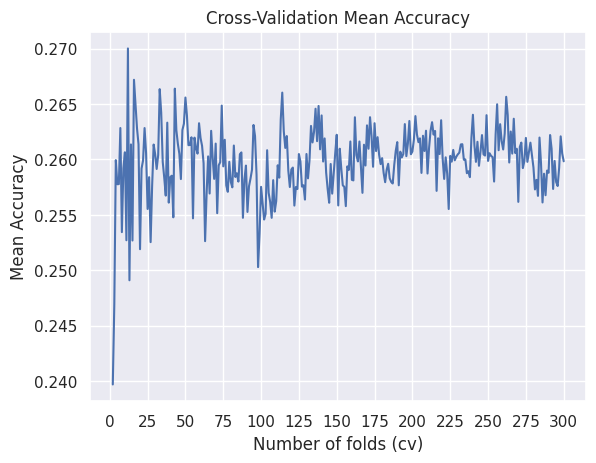

In [78]:
B_list = range(2,301) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(B_list, Bayes_model, X, y, 25)

Conclusione dello studio i classificatori Bayesiani BernoulliNB e ComplementNB si comportano decisamente meglio dei GaussinNB e MultinominalNB inoltre sembrano avere una stabilità maggiore e oscillano entrambi in un range estremamente vicino alla moda che vogliamo cercare di superare, per quanto riguarda il miglio k però si differenziano il ComplementNB ottiene i migliori risultati con 17 <= K <= 25, mentre il BernoulliNB ottieme le megliori performance tra 200 <= K <= 275 e questo sembra sospettoso bisognerà fare alcuni affrofondimenti su come lavora il classificatore Bayesiano di Bernoulli.